# <div class="alert alert-info" style="color:red">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;South African languages classification</div>

In [291]:
 %%html
<img src="nunu.jpg" alt="alternatetext">

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Sentiment Analysis</a>

<a href=#five>5. Data Processing and Engineering </a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

In [273]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn import metrics

import string 
import pandas as pd

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
# Packages for data analysis
import numpy as np
import pandas as pd
from time import time

# Packages for visualisations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
import time

# Packages for preprocessing
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
import emoji
from ftfy import fix_text
from spellchecker import SpellChecker 
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import itertools
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
# Packages for evaluating model accuracy
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize

# Packages for saving models
import pickle

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F5480264\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [234]:
pip install shap

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are loading the data from the `df_train` file into a DataFrame. |

---

In [235]:
# Load Data
df_train = pd.read_csv('train_set.csv')
df_test =pd.read_csv('test_set.csv')

In [236]:
df_train.head(11)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga di tla lebelela diphetogo tša mebaraka ya mešomo le mekgwa ga mmogo le go thapiwa mešomong ka makaleng ao mešomo ao lego molaong le ao a sego molaong le go hloka me omo
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tshekong go ya ka temana ya a e tshwanetse kwa ntle ga fa kgetse e tsholotswe kgotsa e fetiseditswe kwa kgotlatshekelo ya bana ya fetisediwa kwa kgotlatshekelo ya bosiamisi ya ngwana gore a ikarabele mo tatofatsong le go sekiwa ga kgetse go ya ka kgaolo ya
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele apo a khothe ya madzhisitirata lihoro line la si vhe na mulandu li do vha lone line la wana masheleni ngeno lihoro le la wanwa mulandu li tshi do vha lone line la tea u lifha ayo masheleni o laelwaho nga khothe
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le mongwe go tonakgolo le go thteramelao ya profense malebana le taolo ya dipotfolio tša bona mme maloko a mangwe ka moka a khuduthamaga le wona bjalo a ikrabela ka seboka mabapi le phethagatšo ya mediro ya mmušo wa profense le go merero ya wona
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha lesedi le le benyabenyang le le bogale jo bo dirang gore le kgone go bonwa ke motho yo o bonang sentle mo leseding le le tlwaelegileng mo sekgaleng sa dimitara di le


In [237]:
#Train data shape
df_train.shape

(33000, 2)

In [238]:
#Test data shape
df_test.shape

(5682, 2)

In [239]:
#find out the number of each datatype in our data 
print(df_train.dtypes.value_counts())

object    2
dtype: int64


In [240]:
len(df_train)

33000

In [241]:
unique_lang = list(df_train.lang_id.unique())
print(unique_lang)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


In [242]:
len(list(df_train.lang_id.unique()))

11

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


|  Description: Sentiment Analysis |
| :--------------------------- |
| In this section we do sentiment analysis, and possibly create new features - as identified in the EDA phase. |

---

In [243]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [244]:
df_train.lang_id.value_counts()


xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

<AxesSubplot:>

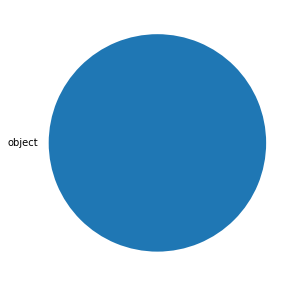

In [245]:
df_train.dtypes.value_counts().plot(kind='pie', ylabel="", figsize=(5,5))

In [246]:
#checking for possible missing values
print(df_train.isnull().sum())


lang_id    0
text       0
dtype: int64


In [295]:
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29937
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele eadresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le
freq,3000,17


In [248]:
df_train.skew()

Series([], dtype: float64)

<a id="five"></a>
## 5. Data Processing and Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [249]:
nltk.download()


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [250]:
pip install stop-words

Note: you may need to restart the kernel to use updated packages.


In [251]:
# global constants
random_state = 42
from string import punctuation

eng_stopword_set = set(stopwords.words('english'))
punctuation_set = set([p for p in punctuation])

print("Stopwords:", len(eng_stopword_set))
print("Punctuation:", len(punctuation_set))

Stopwords: 179
Punctuation: 32


In [290]:
# View Data
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['text'].tail()

32995    popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham                          
32996    modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela
32997    closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address                                                                            
32998    nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene u

# <div class="alert alert-warning" style="color:black">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Text Cleaning</div>

In [253]:
import contractions
import unidecode

# remove non-ascii chars - we explicitly have str.isspace() even though it is an ASCII char
def ascii_filter(text: str) -> str:
    return ''.join([c for c in text if c.isascii() or c.isspace()])

def clean_series(strings: pd.Series) -> pd.Series:
    strings = strings.copy()
    strings = strings.apply(ascii_filter)
    # fix hashtags
    strings = strings.str.replace(r"# ([A-Za-z]+[A-Za-z0-9]*)", r' #\1', regex=True)
    # replace hashtags with token
    strings = strings.str.replace(r"(#[A-Za-z]+[A-Za-z0-9]*)", 'hashtag', regex=True)
    # replace usernames
    strings = strings.str.replace(r"(@[^\s:]+)", 'user', regex=True)
    # replace all urls with link
    strings = strings.str.replace(r"(http[^\s]+)", 'link', regex=True)
    # fix unicode anomalies
    strings = strings.apply(unidecode.unidecode)
    # fix contractions
    strings = strings.apply(lambda msg: contractions.fix(msg, slang=False))
    # remove any non alphabetic chars and replace with spaces
    # replace the html characters with " "
    text = re.sub('<.*?>', ' ', text)
    strings = strings.str.replace(r"([^A-Za-z0-9 ])+", ' ', regex=True)
    # remove any instance of more than 1 whitespace, replace with single space
    return strings.str.replace(r"\s{2,}", ' ', regex=True).str.strip()

In [254]:
# Applying function to clean text feature
df_train['text'] = df_train['text'].apply(clean_text)
df_test['text'] = df_test['text'].apply(clean_text)

In [255]:
# Remove Punctutaion Noise
df_train['text'] = df_train['text'].apply(remove_punctuation)

In [256]:
# Verify Actions
pd.set_option('display.max_colwidth', -1)      # set to display full text in df
df_train['text'].tail()

32995    popo ya dipolateforomo tse ke go tlisa boeteledipele ka mo saenseng ya lefatse ka mo go rona mme se ke kgato e kgolo ya go ya pele ka popontšhwa ya thekeniki ya biothekeniki ga bua motsamaisi wa thekenoloji ya biotekeniki wa lefapha la saense le thekenoloji mor ben durham                          
32996    modise mosadi na o ntse o sa utlwe hore thabang o rata ho iketsa sengangele jwang hona jwale ke mona o se a bolela ka moo a batlang ho lokollelwa ngwana wa hae ka teng wena jwale o batla ho jarisa nna melato ya hae jwalo ka ha eka ke nna ya mo rommeng hore a mathakake le banana ba motse oo kaofela
32997    closing date for the submission of completed tenders is august at h no late submissions will be considered submissions must be enclosed in a sealed envelope and addressed to the chief executive officer at the above address                                                                            
32998    nawuphina umntu ofunyenwe enetyala phantsi kwalo mthetho ujongene u

In [257]:
# Recover default matplotlib settings
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

In [258]:
#x1 = [1,2,3,4,5,6,7]
#y1 = [10,20,30,40,50,60,65]
#sns.barplot(x=x1,y=y1)
#plt.show()

<a id="six"></a>
## 6. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Feature Engineering ⚡ |
| :--------------------------- |
| In this section, we create one or more classification models that are able to accurately classify if people believe in climate change or not. |

---

In [315]:
# First features and label 
X = df_train['text']
y = df_train['lang_id']

# split data to Train/Test set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)


<a id="seven"></a>
## 7. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [316]:
#names = ['Logistic Regression', 'Nearest Neighbors',
   #      'Linear SVM', 'RBF SVM',
   #      'Decision Tree', 'Random Forest',  'AdaBoost']

In [325]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
model = MultinomialNB(alpha=1, fit_prior=True, class_prior=None)


In [326]:
classifiers_df = models_building(classifiers, X_train, y_train, X_val, y_val)
ordered_df = classifiers_df.sort_values('F1-Macro', ascending=False)
ordered_df


,F1-Macro,F1-Accuracy,F1-Weighted,Execution Time
MultinomialNB,0.998788,0.998788,0.998786,5.178520
ComplementNB,0.998485,0.998485,0.998484,5.135698
LinearSVC,0.996667,0.996667,0.996663,14.409344
LogisticRegression,0.996667,0.996667,0.996663,158.297167
SVC,0.995758,0.995758,0.995752,834.834923
SGDClassifier,0.986667,0.986667,0.986609,5.995070
KNeighborsClassifier,0.970606,0.970606,0.970387,8.262601
RandomForestClassifier,0.768485,0.768485,0.763198,6.197007


In [327]:
# Refining the train-test split for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)


In [323]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

tuned_mnb = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                 max_df=0.9
                                                ,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

tuned_mnb.fit(X_train, y_train)  # Fitting the model

y_pred_mnb = tuned_mnb.predict(X_val)  # predicting the fit on validation set

print(classification_report(y_val, y_pred_mnb))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       297
         eng       1.00      1.00      1.00       284
         nbl       1.00      1.00      1.00       300
         nso       1.00      1.00      1.00       316
         sot       1.00      1.00      1.00       298
         ssw       1.00      1.00      1.00       294
         tsn       1.00      1.00      1.00       283
         tso       1.00      1.00      1.00       314
         ven       1.00      1.00      1.00       292
         xho       1.00      1.00      1.00       303
         zul       1.00      1.00      1.00       319

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



# 6. Conclusion

In [324]:
submission_df = pd.DataFrame(df_test['index'])
submission_df['lang_id'] = tuned_mnb.predict(df_test['text'])
submission_df.to_csv('submission_5.csv', index=False)